In [12]:
pip install librosa


  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/e2/a2/4f639c1168d7aada749a896afb4892a831e2041bebdcf636aebfe9e86556/librosa-0.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.0 MB 262.6 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/1.0 MB 438.9 kB/s eta 0:00:03
     ------ --------------------------------- 0.2/1.0 MB 876.1 kB/s eta 0:00:01
     ---------- ----------------------------- 0.3/1.0 MB 1.2 MB/s eta 0:00:01
     --------------- ------------------------ 0.4/1.0 MB 1

In [24]:
import numpy as np
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import librosa
from matplotlib import pyplot as plt
import librosa.display

In [15]:
for dirname, _, filenames in os.walk('16000_pcm_speeches'):
    for filename in filenames:
        all_file = os.path.join(dirname, filename)
        print(all_file)


16000_pcm_speeches\tf_Wav_reader.py
16000_pcm_speeches\Benjamin_Netanyau\0.wav
16000_pcm_speeches\Benjamin_Netanyau\1.wav
16000_pcm_speeches\Benjamin_Netanyau\10.wav
16000_pcm_speeches\Benjamin_Netanyau\100.wav
16000_pcm_speeches\Benjamin_Netanyau\1000.wav
16000_pcm_speeches\Benjamin_Netanyau\1001.wav
16000_pcm_speeches\Benjamin_Netanyau\1002.wav
16000_pcm_speeches\Benjamin_Netanyau\1003.wav
16000_pcm_speeches\Benjamin_Netanyau\1004.wav
16000_pcm_speeches\Benjamin_Netanyau\1005.wav
16000_pcm_speeches\Benjamin_Netanyau\1006.wav
16000_pcm_speeches\Benjamin_Netanyau\1007.wav
16000_pcm_speeches\Benjamin_Netanyau\1008.wav
16000_pcm_speeches\Benjamin_Netanyau\1009.wav
16000_pcm_speeches\Benjamin_Netanyau\101.wav
16000_pcm_speeches\Benjamin_Netanyau\1010.wav
16000_pcm_speeches\Benjamin_Netanyau\1011.wav
16000_pcm_speeches\Benjamin_Netanyau\1012.wav
16000_pcm_speeches\Benjamin_Netanyau\1013.wav
16000_pcm_speeches\Benjamin_Netanyau\1014.wav
16000_pcm_speeches\Benjamin_Netanyau\1015.wav
16000_pc

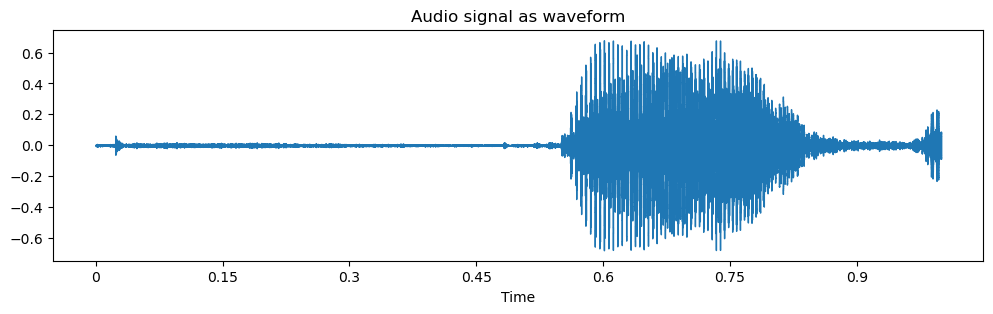

In [33]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
# Loads mp3 file with a specific sampling rate, here 16kHz
y, sr = librosa.load("16000_pcm_speeches/Jens_Stoltenberg/10.wav", sr=16_000)

# Plot the signal stored in 'y'
plt.figure(figsize=(12, 3))
plt.title("Audio signal as waveform")
librosa.display.waveshow(y, sr=sr);
plt.show()

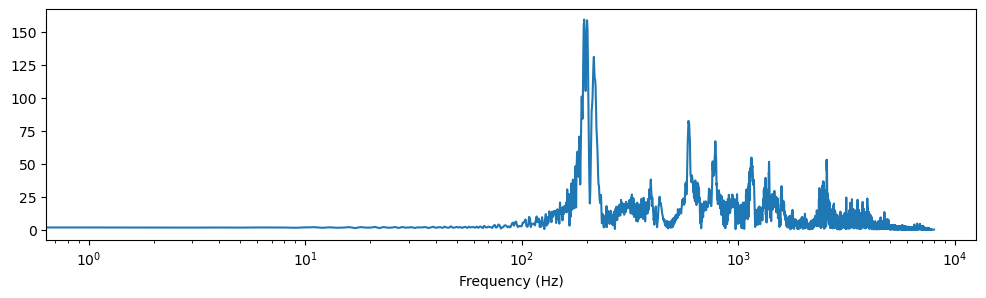

In [34]:
import scipy
import numpy as np

# Applies fast fourier transformation to the signal and takes absolute values
y_freq = np.abs(scipy.fftpack.fft(y))

# Establishes all possible frequency
# (dependent on the sampling rate and the length of the signal)
f = np.linspace(0, sr, len(y_freq))

# Plot audio signal as frequency information.
plt.figure(figsize=(12, 3))
plt.semilogx(f[: len(f) // 2], y_freq[: len(f) // 2])
plt.xlabel("Frequency (Hz)")
plt.show();

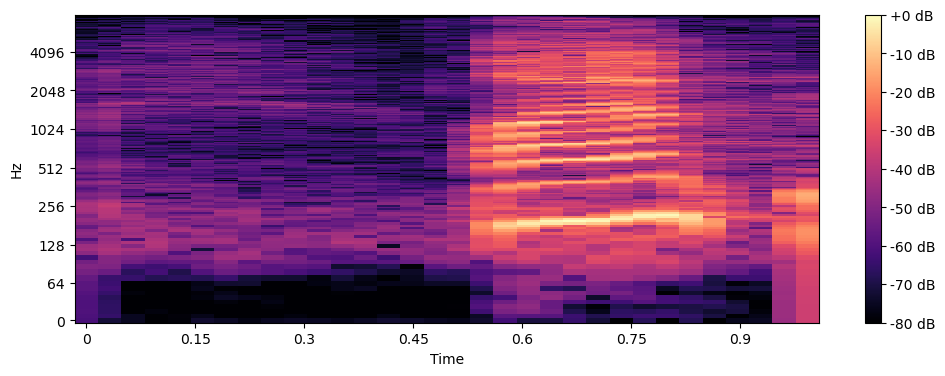

In [43]:
import librosa.display

# Compute short-time Fourier Transform
x_stft = np.abs(librosa.stft(y))

# Apply logarithmic dB-scale to spectrogram and set maximum to 0 dB
x_stft = librosa.amplitude_to_db(x_stft, ref=np.max)

# Plot STFT spectrogram
plt.figure(figsize=(12, 4))
librosa.display.specshow(x_stft, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.show();